# Example spot-variation FCS

Load packages

In [1]:
from brighteyes_ffs.fcs.fcs2corr import fcs_load_and_corr_split as correlate
from brighteyes_ffs.fcs.fcs_fit import fcs_fit
from brighteyes_ffs.fcs_gui.read_ffs import read_g_from_ffs
import matplotlib.pyplot as plt
import numpy as np

File name and correlations to calculate

In [2]:
file = r'C:\Users\eslenders\OneDrive - Fondazione Istituto Italiano Tecnologia\SPAD-FCS\Data\20211130 beads Nikon School\beads20nm.bin'
list_of_g = ['central', 'sum3', 'sum5']

## Calculate correlations

In [3]:
G, time_trace = correlate(file, list_of_g=list_of_g, accuracy=16, split=10, time_trace=True)

+--------------------+
| Loading chunk 1/10 |
+--------------------+
Elements: 2000000
Positions: 1000000
Freeing memory
Done.
data table: (1000000, 2)
Converting data to counts
Done.
chunksize = 1000000 - 10000
N = 10
     --> central: Calculating autocorrelation central detector element
     --> sum3: Calculating autocorrelation sum3x3


C:\Users\eslenders\pythonenvs\smismvenv\lib\site-packages\multipletau\core.py:412: RuntimeWarning: divide by zero encountered in scalar divide
  if np.abs(traceavg1) / np.median(np.abs(v)) < ZERO_CUTOFF:
C:\Users\eslenders\pythonenvs\smismvenv\lib\site-packages\multipletau\core.py:414: RuntimeWarning: divide by zero encountered in scalar divide
  if np.abs(traceavg2) / np.median(np.abs(a)) < ZERO_CUTOFF:
C:\Users\eslenders\pythonenvs\smismvenv\lib\site-packages\multipletau\core.py:435: InvalidMWarning: Input dtype is not float; casting to np.float_!
  warnings.warn("Input dtype is not float; casting to np.float_!",


     --> sum5: Calculating autocorrelation sum5x5
+--------------------+
| Loading chunk 2/10 |
+--------------------+
Elements: 2000000
Positions: 1000000
Freeing memory
Done.
data table: (1000000, 2)
Converting data to counts
Done.
chunksize = 1000000 - 10000
N = 10
     --> central: Calculating autocorrelation central detector element
     --> sum3: Calculating autocorrelation sum3x3
     --> sum5: Calculating autocorrelation sum5x5
+--------------------+
| Loading chunk 3/10 |
+--------------------+
Elements: 2000000
Positions: 1000000
Freeing memory
Done.
data table: (1000000, 2)
Converting data to counts
Done.
chunksize = 1000000 - 10000
N = 10
     --> central: Calculating autocorrelation central detector element
     --> sum3: Calculating autocorrelation sum3x3
     --> sum5: Calculating autocorrelation sum5x5
+--------------------+
| Loading chunk 4/10 |
+--------------------+
Elements: 2000000
Positions: 1000000
Freeing memory
Done.
data table: (1000000, 2)
Converting data to

Text(0, 0.5, 'Photon counts per bin')

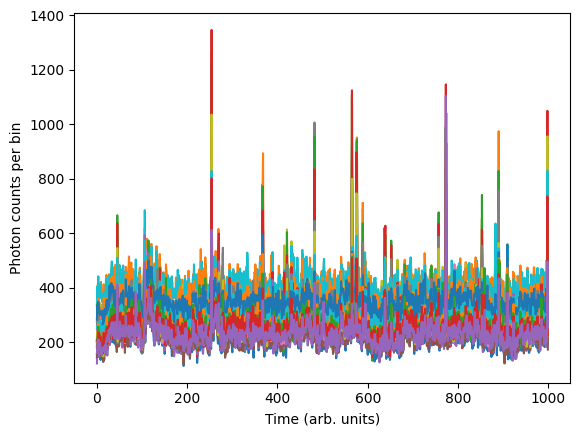

In [4]:
plt.figure()
for i in range(25):
    plt.plot(time_trace[:,i])
plt.xlabel('Time (arb. units)')
plt.ylabel('Photon counts per bin')

findfont: Font family ['DejaVu Sans Display'] not found. Falling back to DejaVu Sans.


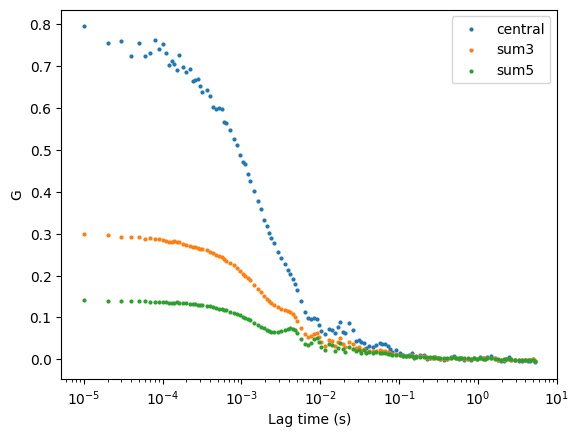

In [5]:
plt.figure()
for corr in list_of_g:
    Gsingle = getattr(G, corr + '_average')
    plt.scatter(Gsingle[1:,0], Gsingle[1:,1], s=4, label=corr)
plt.legend()
plt.xlabel('Lag time (s)')
plt.ylabel('G')
plt.xscale('log')

## Fit correlations

Order of the parameters for fitting
* N: number of particles in focal volume [dim.less]
* tauD1: diffusion time species 1 [ms]
* tauD2: diffusion time species 2 [ms]
* F: fraction of species 1 [dim.less]
* alpha: relative molecular brightness [dim.less]
* T: fraction in triplet [dim.less]
* tautrip: residence time in triplet state [µs]
* SF: shape factor [dim.less]
* offset  [dim.less]
* A, B    afterpulsing properties

In [6]:
fitresults = []
for corr in list_of_g:
    Gsingle = getattr(G, corr + '_average')
    Gexp = Gsingle[1:,1]
    tau = Gsingle[1:,0]
    fitfun = 'fitfun_2c'
    fit_info = np.asarray([1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0]) # fit N, tauD, and offset (we fit with one component)
    param = np.asarray([1, 1, 1, 1, 1, 0, 0, 3, 0, 0, 0]) # starting values for all parameters
    lBounds = np.asarray([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])*(-1e6) # lower bounds for all parameters
    uBounds = np.asarray([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])*(1e6) # upper bounds for all parameters
    fitresult = fcs_fit(Gexp, tau, fitfun, fit_info, param, lBounds, uBounds, plotInfo=-1)
    fitresults.append(fitresult)

C:\Users\eslenders\pythonenvs\smismvenv\lib\site-packages\brighteyes_ffs\fcs\fcs_analytical.py:102: RuntimeWarning: divide by zero encountered in divide
  Gy *= (1 + (T * np.exp(-tau / tautrip)) / (1 - T))


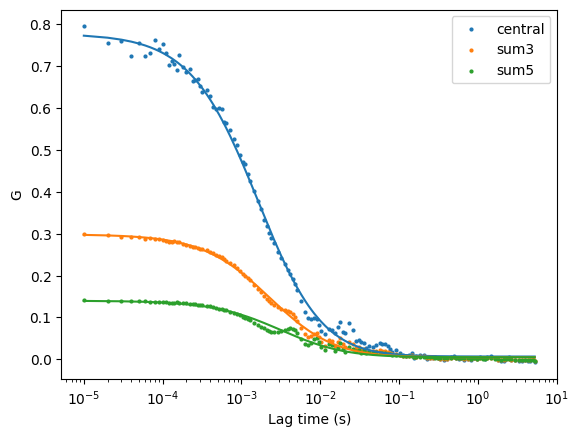

In [7]:
plt.figure()
for i, corr in enumerate(list_of_g):
    # plot correlation
    Gsingle = getattr(G, corr + '_average')
    plt.scatter(Gsingle[1:,0], Gsingle[1:,1], s=4, label=corr)
    # plot fit
    fitresult = fitresults[i]
    plt.plot(Gsingle[1:,0], Gsingle[1:,1]-fitresult.fun)
plt.legend()
plt.xlabel('Lag time (s)')
plt.ylabel('G')
plt.xscale('log')

In [8]:
for i, corr in enumerate(list_of_g):
    fitresult = fitresults[i]
    print(corr)
    print('N = ' + str(fitresult.x[0]))
    print('tau_D = ' + str(fitresult.x[1]) + 'ms')
    print('offset = ' + str(fitresult.x[2]))
    print()
#fitresult.fun

central
N = 1.2964784055396756
tau_D = 1.6678004919173235ms
offset = 0.0066364931710454645

sum3
N = 3.4065919989458893
tau_D = 2.3689344225819866ms
offset = 0.005008903529390524

sum5
N = 7.409933998640888
tau_D = 3.2430276517952397ms
offset = 0.004978879535915703

